Shows MLP Classification for simple cases. Also shows perceptron for AND.

In [1]:
import numpy as np
import matplotlib as plt
import math

In [2]:
from sklearn.neural_network import MLPClassifier
X = [[0., 0.], [1., 1.]]
y = [0, 1] #When you call Classifier, the possible labels are determined by the values in the output
#alpha is the regularization term to prevent overfitting. alpha = 0.00001.
# (5, 2) means 2 hidden layers (since tuple has 2 values),
#     the first hiddle layer (tuple 1) has 5 nodes and second (tuple 2) has 2.
#see https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(X, y)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

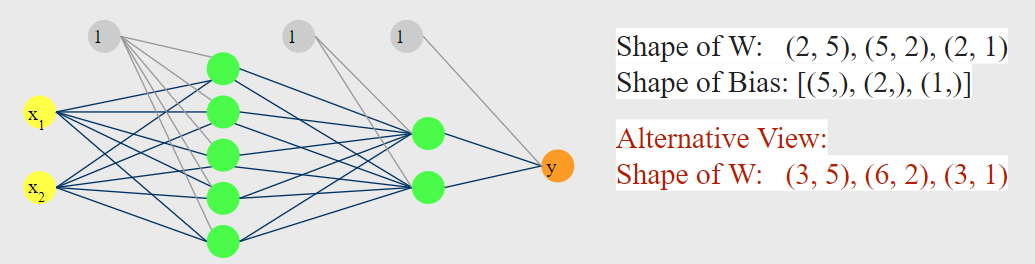

In [3]:
print(clf.predict([[1., 1.]]))
print(clf.predict([[0.,0.]]))

[1]
[0]


In [4]:
clf.predict([[1., 1.], [0., 0.]])

array([1, 0])

In [5]:
clf.predict([[2., 2.], [-1., -2.]])

array([1, 0])

In [6]:
#clf.coefs_ contains the solved weight matrices
#Here input layer as 2 links
[coef.shape for coef in clf.coefs_]

[(2, 5), (5, 2), (2, 1)]

In [7]:
[intercept.shape for intercept in clf.intercepts_]

[(5,), (2,), (1,)]

In [8]:
#MLP trains using a form of gradient descent and the gradients are calculated using Backpropagation.
# For classification, it minimizes the Cross-Entropy loss function, giving a vector of probability estimates
#   P(y|x) for each sample x:
# This can be printed out by:
n_pre = 10
np.set_printoptions(precision=n_pre,suppress=True) #print with n_pre decimal places and suppress scientific notation
print(clf.predict_proba([[2., 2.]])) #The max prob for this sample is class '1' or y = 1. Thus 1 is the predicted output
print(clf.predict_proba([[-1., -2.]])) #The max prob for this sample is class '0' or y = 0. Thus 0 is the predicted output.

[[0.000196718 0.999803282]]
[[1. 0.]]


In [11]:
#MLPClassifier does multi-class classification by applying Softmax as the output function.
#The sigmoid function is used for the two-class logistic regression,
#    whereas the softmax function is used for the multiclass logistic regression
#
#Example of multi-label classification where one sample can belong to more than 1 class.
#For each class, the raw output passes through the logistic function.
#  Values larger or equal to 0.5 are rounded to 1, otherwise to 0.
#  For a predicted output y[i] of a sample X[i], the indices where the value is 1 represents
#    the assigned classes of that sample:
X = [[0., 0.], [1., 1.]]
y = [[0, 1], [1, 1]]
#When you call Classifier, the possible labels are determined by the values in the output
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
clf.fit(X, y)
print(clf.predict([[1., 2.]]))
print(clf.predict([[0., 0.]]))

[[1 1]]
[[0 1]]


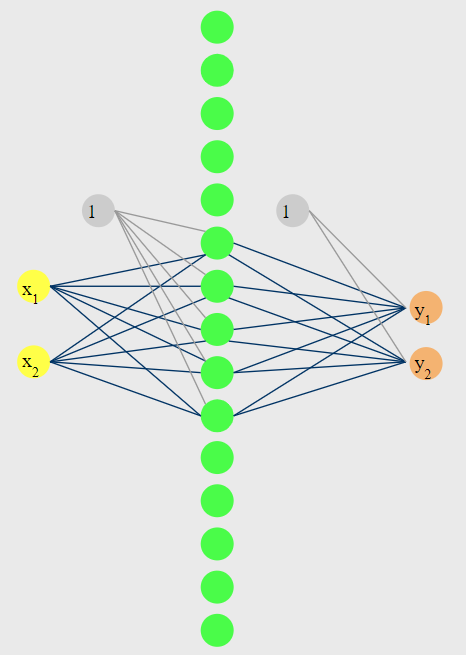

In [12]:
#clf.coefs_ contains the solved weight matrices
#Here input layer as 2 links
[coef.shape for coef in clf.coefs_]

[(2, 15), (15, 2)]

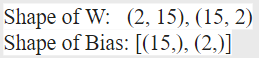

In [13]:
[intercept.shape for intercept in clf.intercepts_]

[(15,), (2,)]

In [16]:
#The XOR Problem
X = [[0., 0.], [0., 1.], [1., 0.], [1., 1.]]
y = [0., 1., 1., 0.]
#alpha is the regularization term to prevent overfitting. alpha = 0.00001.
# (10,) means 1 hidden layers (since tuple has 1 value),
#     the hidden layer (tuple 1) has 10 nodes.
#see https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(12,), random_state=1, max_iter = 1000)

clf.fit(X, y)
print("X: \n", X)
print("y: \n", y)


X: 
 [[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]]
y: 
 [0.0, 1.0, 1.0, 0.0]


In [17]:
clf.predict(X)

array([0., 1., 1., 0.])

In [18]:
clf.predict([[0.,0.]])

array([0.])

In [19]:
n_pre = 5
np.set_printoptions(precision=n_pre,suppress=True) #print with n_pre decimal places and suppress scientific notation
clf.predict_proba(X)

array([[0.99991, 0.00009],
       [0.     , 1.     ],
       [0.00008, 0.99992],
       [1.     , 0.     ]])

In [20]:
#The XOR Problem
X = [[0., 0.], [0., 1.], [1., 0.], [1., 1.]]
y = [0., 1., 1., 0.]
#alpha is the regularization term to prevent overfitting. alpha = 0.00001.
# (5, 2) means 2 hidden layers (since tuple has 2 values),
#     the first hiddle layer (tuple 1) has 5 nodes and second (tuple 2) has 2.
#see https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5,2), random_state=1, max_iter = 10000)

clf.fit(X, y)
clf.predict(X)

array([0., 0., 1., 0.])

In [21]:
n_pre = 5
np.set_printoptions(precision=n_pre,suppress=True) #print with n_pre decimal places and suppress scientific notation
clf.predict_proba(X)

array([[1.     , 0.     ],
       [0.50787, 0.49213],
       [0.00148, 0.99852],
       [0.50787, 0.49213]])

In [14]:
from sklearn.linear_model import Perceptron
model = Perceptron()
#The AND Problem
X = [[0., 0.], [0., 1.], [1., 0.], [1., 1.]]
y = [0., 0., 0., 1.]
model.fit(X, y)

Perceptron()

In [15]:
# evaluate the fit
y_model = model.predict(X)
from sklearn.metrics import accuracy_score
score = accuracy_score(y, y_model)
print("y output: ", y_model)
print("Score: ", score)

y output:  [0. 0. 0. 1.]
Score:  1.0
